In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def drop_high_reg(df):
    return df[df.Regularization != 0.01]

def check_how_many_interval(df, max_difference):
    acc = df["Accuracy"]
    max_value = acc.max()
    df_filtered = df.loc[(df['Accuracy'] >= max_value - max_difference)]
    print("here max accuracy:")
    print(df.loc[(df['Accuracy'] == max_value)])
    loss = df["Loss"]
    min_value = loss.min()
    print("here min loss:")
    print(df.loc[(df['Loss'] == min_value)])
    print(list(df.columns))
    return len(df_filtered.index)

def plot_acc_and_loss(df):
    figure, ax1 = plt.subplots()
    ax1.plot(df[df.columns[0]],df['Accuracy'],linewidth=0.5,zorder=1, label = "Accuracy")
    figure, ax2 = plt.subplots()
    ax2.plot(df[df.columns[0]],df['Loss'],linewidth=0.5,zorder=1, label = "Accuracy")
    
    
def extra_plot_acc_and_loss(df):
    figure, ax1 = plt.subplots()
    ax1.plot(df[df.columns[0]][0:48],df['Accuracy'][0:48],linewidth=0.5,zorder=1, label = "Accuracy")
    figure, ax2 = plt.subplots()
    ax2.plot(df[df.columns[0]][0:48],df['Loss'][0:48],linewidth=0.5,zorder=1, label = "Accuracy")
    
def get_average_per_setting(df, possible_values):
    columns = list(df.columns)[1:-2]
    new_cols = ['Parameter', 'Value', 'Average_Accuracy', 'Average_Loss']
    new_df = pd.DataFrame(columns = new_cols) 
    for parameter in columns:
        for setting in possible_values[parameter]:
            filtered_df = df.loc[(df[parameter] == setting)]
            av_acc = sum(filtered_df['Accuracy'])/len(filtered_df['Accuracy'])
            av_loss = sum(filtered_df['Loss'])/len(filtered_df['Loss'])
            new_row = {'Parameter':parameter,'Value':setting,'Average_Accuracy':av_acc, 'Average_Loss':av_loss}
            new_df = new_df.append(new_row, ignore_index=True)
    return(new_df)

def get_average_over_multiple(df_list): #give the average value of a setting over multiple process models, input list of dataframes
    cols = list(df_list[0].columns)
    new_df = pd.DataFrame(columns = cols) 
    for index, row in df_list[0].iterrows():
        accuracys = []
        losses = []
        for df in df_list:
            accuracys.append(df.loc[index, "Accuracy"])
            losses.append(df.loc[index, "Loss"])
        av_acc = sum(accuracys)/len(accuracys)
        av_loss = sum(losses)/len(losses)
        new_row = {'Unnamed: 0':row['Unnamed: 0'],'Bidirectional':row['Bidirectional'],
                   'Nr_layers': row['Nr_layers'], 'Layer_size':row['Layer_size'],
                   'Regularization': row['Regularization'], 'Dropout': row['Dropout'],
                   'Accuracy':av_acc,'Loss':av_loss}
        new_df = new_df.append(new_row, ignore_index=True)
    return new_df

def get_average_per_setting_over_multiple(new_df_list):
    cols = list(new_df_list[0].columns)
    new_df = pd.DataFrame(columns = cols) 
    for index, row in new_df_list[0].iterrows():
        accuracys = []
        losses = []
        for df in new_df_list:
            accuracys.append(df.loc[index, "Average_Accuracy"])
            losses.append(df.loc[index, "Average_Loss"])
        av_acc = sum(accuracys)/len(accuracys)
        av_loss = sum(losses)/len(losses)
        new_row = {'Parameter':row['Parameter'],'Value':row['Value'],'Average_Accuracy':av_acc,'Average_Loss':av_loss}
        new_df = new_df.append(new_row, ignore_index=True)
    return new_df



In [3]:
#dictionary with for each parameter the possible values
possible_values = {}
possible_values["Bidirectional"] = [False, True]
possible_values["Nr_layers"] = [1, 2]
possible_values["Layer_size"] = [16, 32, 64]
possible_values["Regularization"] = [0.0, 0.0001, 0.001, 0.01]
possible_values["Dropout"] = [0.0 ,0.2, 0.4, 0.6]


max_difference = 0.01

df_list = []

averages_list = []

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
114         114           True          1          32             0.0   

     Dropout      Loss  Accuracy  
114      0.4  0.644758  0.622305  
here min loss:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
131         131           True          1          64             0.0   

     Dropout      Loss  Accuracy  
131      0.6  0.643729  0.621784  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 168
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.557558      0.928736
1    Bidirectional    True          0.557793      0.922679
2        Nr_layers       1          0.616921      0.678338
3        Nr_layers       2          0.498429      1.173077
4       Layer_size      16          0.557622      0.926945
5       Layer_size      32          

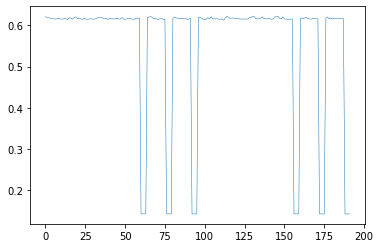

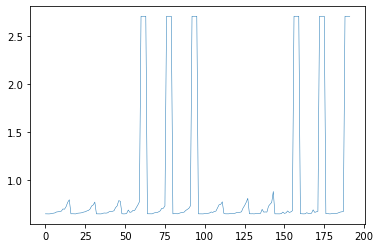

In [4]:
name = 'PN_par00'

df = pd.read_csv(name + '.csv')
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
147         147           True          2          16             0.0   

     Dropout      Loss  Accuracy  
147      0.6  0.427996  0.742725  
here min loss:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
147         147           True          2          16             0.0   

     Dropout      Loss  Accuracy  
147      0.6  0.427996  0.742725  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 166
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.664342      0.721014
1    Bidirectional    True          0.664767      0.710372
2        Nr_layers       1          0.737237      0.468282
3        Nr_layers       2          0.591872      0.963105
4       Layer_size      16          0.664154      0.717819
5       Layer_size      32          

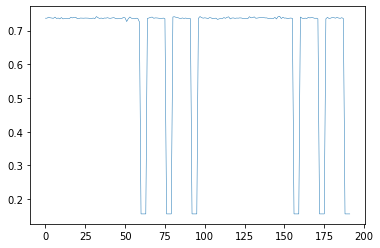

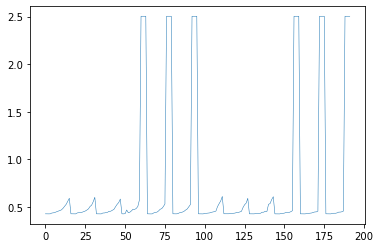

In [5]:
name = 'PN_par05'

df = pd.read_csv(name + '.csv')
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
148         148           True          2          16          0.0001   

     Dropout      Loss  Accuracy  
148      0.0  0.470924  0.746635  
here min loss:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
147         147           True          2          16             0.0   

     Dropout      Loss  Accuracy  
147      0.6  0.466278  0.746439  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 161
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.667087      0.753439
1    Bidirectional    True          0.665704      0.748740
2        Nr_layers       1          0.737410      0.520655
3        Nr_layers       2          0.595381      0.981524
4       Layer_size      16          0.666164      0.756649
5       Layer_size      32          

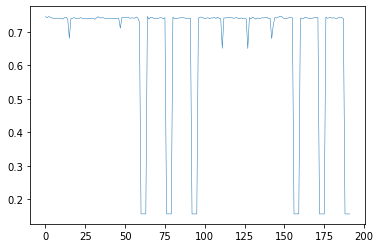

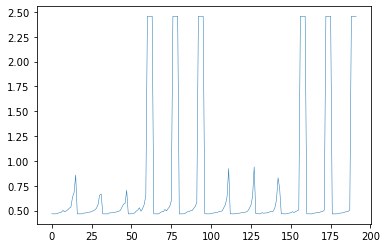

In [6]:
name = 'PN_par10'

df = pd.read_csv(name + '.csv')
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
129         129           True          1          64             0.0   

     Dropout      Loss  Accuracy  
129      0.2  0.454237  0.752526  
here min loss:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
114         114           True          1          32             0.0   

     Dropout      Loss  Accuracy  
114      0.4  0.453902  0.751776  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 155
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.670328      0.775622
1    Bidirectional    True          0.672621      0.758638
2        Nr_layers       1          0.749405      0.503327
3        Nr_layers       2          0.593544      1.030933
4       Layer_size      16          0.669596      0.775509
5       Layer_size      32          

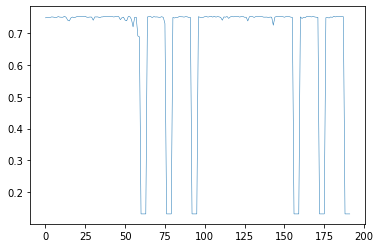

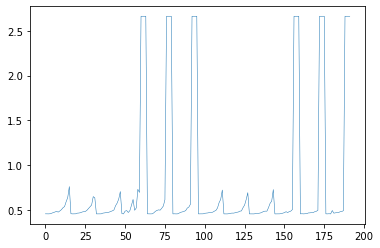

In [7]:
name = 'PN_par15'

df = pd.read_csv(name + '.csv')
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
84          84          False          2          64          0.0001      0.0   

        Loss  Accuracy  
84  0.420315  0.804207  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
18          18          False          1          32             0.0      0.4   

        Loss  Accuracy  
18  0.408176  0.800946  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 167
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.716394      0.722373
1    Bidirectional    True          0.716489      0.712561
2        Nr_layers       1          0.801164      0.448805
3        Nr_layers       2          0.631719      0.986129
4       Layer_size      16          0.716060      0.720118
5       Layer_size      32          0.716707

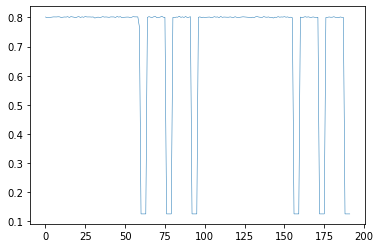

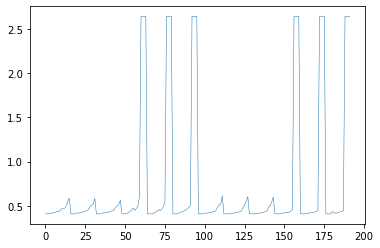

In [8]:
name = 'PN_par20'

df = pd.read_csv(name + '.csv')
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
171         171           True          2          32           0.001   

     Dropout      Loss  Accuracy  
171      0.6  0.579358  0.686134  
here min loss:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
177         177           True          2          64             0.0   

     Dropout     Loss  Accuracy  
177      0.2  0.51431  0.678661  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 156
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.616115      0.756342
1    Bidirectional    True          0.616381      0.745041
2        Nr_layers       1          0.679397      0.562857
3        Nr_layers       2          0.553099      0.938526
4       Layer_size      16          0.615579      0.754557
5       Layer_size      32          0.

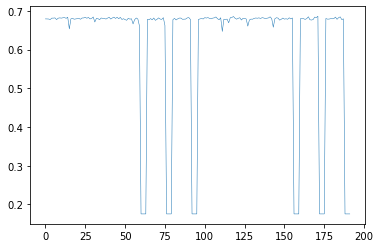

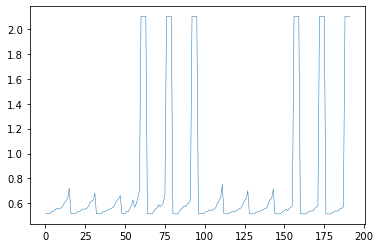

In [9]:
name = 'PN_par25'

df = pd.read_csv(name + '.csv')
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
68          68          False          2          32          0.0001      0.0   

        Loss  Accuracy  
68  0.314969  0.791753  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
34          34          False          1          64             0.0      0.4   

        Loss  Accuracy  
34  0.303684    0.7911  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 165
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.702662      0.635929
1    Bidirectional    True          0.703029      0.624537
2        Nr_layers       1          0.787627      0.353870
3        Nr_layers       2          0.618064      0.906597
4       Layer_size      16          0.701461      0.634619
5       Layer_size      32          0.703562

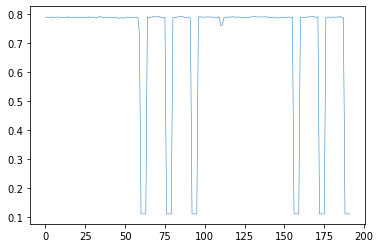

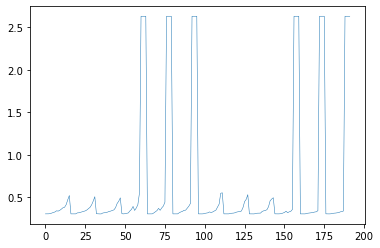

In [10]:
name = 'PN_par30'

df = pd.read_csv(name + '.csv')
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
102         102           True          1          16          0.0001   

     Dropout      Loss  Accuracy  
102      0.4  0.326912  0.811786  
here min loss:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
145         145           True          2          16             0.0   

     Dropout     Loss  Accuracy  
145      0.2  0.31629  0.809515  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 166
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.721175      0.636904
1    Bidirectional    True          0.721303      0.623896
2        Nr_layers       1          0.809260      0.362330
3        Nr_layers       2          0.633218      0.898470
4       Layer_size      16          0.720702      0.634966
5       Layer_size      32          0.

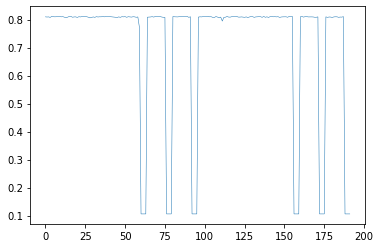

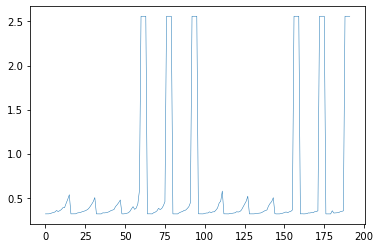

In [11]:
name = 'PN_par35'

df = pd.read_csv(name + '.csv')
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
171         171           True          2          32           0.001   

     Dropout      Loss  Accuracy  
171      0.6  0.552286  0.748321  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
81          81          False          2          64             0.0      0.2   

        Loss  Accuracy  
81  0.501541  0.744198  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 164
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.662505      0.762628
1    Bidirectional    True          0.665798      0.745616
2        Nr_layers       1          0.745536      0.538169
3        Nr_layers       2          0.582767      0.970075
4       Layer_size      16          0.660907      0.762996
5       Layer_size      32          0.66

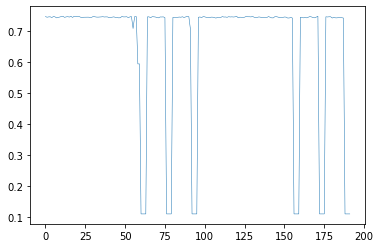

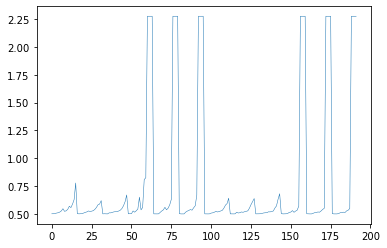

In [12]:
name = 'PN_par40'

df = pd.read_csv(name + '.csv')
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
147         147           True          2          16             0.0   

     Dropout    Loss  Accuracy  
147      0.6  0.3983  0.763318  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
66          66          False          2          32             0.0      0.4   

       Loss  Accuracy  
66  0.39775  0.761401  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 159
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.674504      0.686546
1    Bidirectional    True          0.677060      0.665048
2        Nr_layers       1          0.759332      0.431509
3        Nr_layers       2          0.592233      0.920085
4       Layer_size      16          0.673615      0.688303
5       Layer_size      32          0.676603  

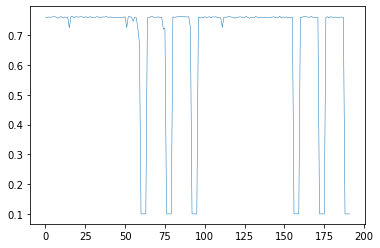

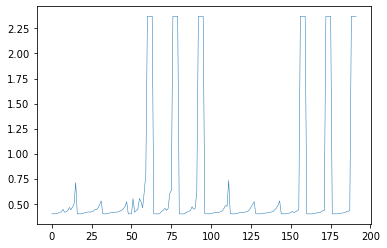

In [13]:
name = 'PN_par45'

df = pd.read_csv(name + '.csv')
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
160         160           True          2          32             0.0   

     Dropout      Loss  Accuracy  
160      0.0  0.327312  0.773116  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
82          82          False          2          64             0.0      0.4   

        Loss  Accuracy  
82  0.327212  0.770997  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 168
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.685698      0.621919
1    Bidirectional    True          0.685630      0.609812
2        Nr_layers       1          0.769462      0.367693
3        Nr_layers       2          0.601866      0.864039
4       Layer_size      16          0.685548      0.619353
5       Layer_size      32          0.68

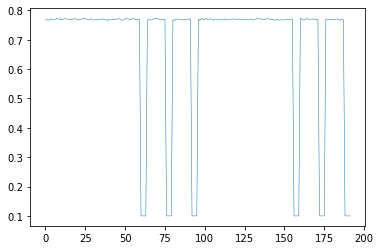

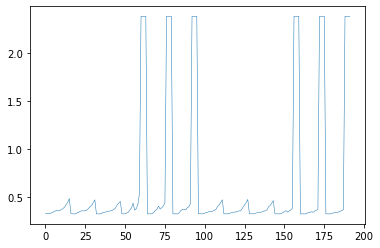

In [14]:
name = 'PN_par50'

df = pd.read_csv(name + '.csv')
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

# averages

In [15]:
all_averages = get_average_over_multiple(df_list)

In [16]:
check_how_many_interval(all_averages, max_difference)

here max accuracy:
   Unnamed: 0 Bidirectional Nr_layers Layer_size  Regularization  Dropout  \
84         84         False         2         64          0.0001      0.0   

        Loss  Accuracy  
84  0.445104  0.746545  
here min loss:
    Unnamed: 0 Bidirectional Nr_layers Layer_size  Regularization  Dropout  \
179        179          True         2         64             0.0      0.6   

         Loss  Accuracy  
179  0.433089  0.745622  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']


163

In [17]:
averages_df = get_average_per_setting_over_multiple(averages_list)

In [18]:
print(averages_df)

         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.667124      0.727405
1    Bidirectional    True          0.667871      0.715176
2        Nr_layers       1          0.744796      0.475985
3        Nr_layers       2          0.590199      0.966596
4       Layer_size      16          0.666492      0.726530
5       Layer_size      32          0.667984      0.719009
6       Layer_size      64          0.668016      0.718333
7   Regularization     0.0          0.745372      0.434222
8   Regularization  0.0001          0.745443      0.451398
9   Regularization   0.001          0.743659      0.479214
10  Regularization    0.01          0.435515      1.520329
11         Dropout     0.0          0.668380      0.706945
12         Dropout     0.2          0.668377      0.713851
13         Dropout     0.4          0.667528      0.723646
14         Dropout     0.6          0.665704      0.740721


# again without 0.01

In [19]:
#dictionary with for each parameter the possible values
possible_values = {}
possible_values["Bidirectional"] = [False, True]
possible_values["Nr_layers"] = [1, 2]
possible_values["Layer_size"] = [16, 32, 64]
possible_values["Regularization"] = [0.0, 0.0001, 0.001]
possible_values["Dropout"] = [0.0 ,0.2, 0.4, 0.6]


max_difference = 0.01

df_list = []

averages_list = []

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
114         114           True          1          32             0.0   

     Dropout      Loss  Accuracy  
114      0.4  0.644758  0.622305  
here min loss:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
131         131           True          1          64             0.0   

     Dropout      Loss  Accuracy  
131      0.6  0.643729  0.621784  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 144
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.616932      0.664486
1    Bidirectional    True          0.617316      0.653842
2        Nr_layers       1          0.617235      0.654996
3        Nr_layers       2          0.617014      0.663332
4       Layer_size      16          0.617032      0.662055
5       Layer_size      32          

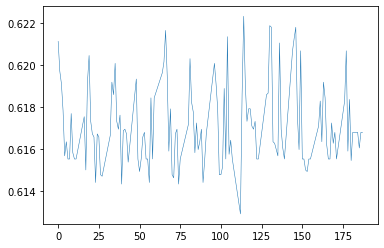

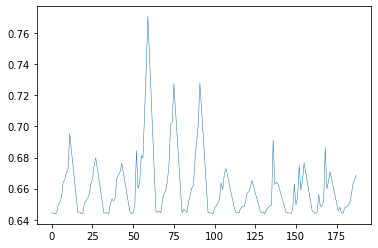

In [20]:
name = 'PN_par00'

df = pd.read_csv(name + '.csv')
df = drop_high_reg(df)

df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
147         147           True          2          16             0.0   

     Dropout      Loss  Accuracy  
147      0.6  0.427996  0.742725  
here min loss:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
147         147           True          2          16             0.0   

     Dropout      Loss  Accuracy  
147      0.6  0.427996  0.742725  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 142
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.737172      0.453308
1    Bidirectional    True          0.737762      0.437931
2        Nr_layers       1          0.737737      0.441564
3        Nr_layers       2          0.737197      0.449676
4       Layer_size      16          0.737013      0.448078
5       Layer_size      32          

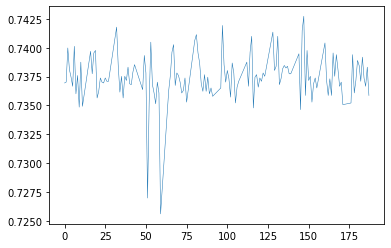

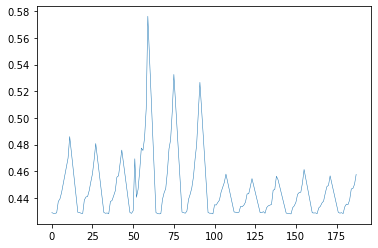

In [21]:
name = 'PN_par05'

df = pd.read_csv(name + '.csv')
df = drop_high_reg(df)

df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
148         148           True          2          16          0.0001   

     Dropout      Loss  Accuracy  
148      0.0  0.470924  0.746635  
here min loss:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
147         147           True          2          16             0.0   

     Dropout      Loss  Accuracy  
147      0.6  0.466278  0.746439  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 143
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.741163      0.491315
1    Bidirectional    True          0.741690      0.477870
2        Nr_layers       1          0.741256      0.479116
3        Nr_layers       2          0.741596      0.490069
4       Layer_size      16          0.741682      0.487751
5       Layer_size      32          

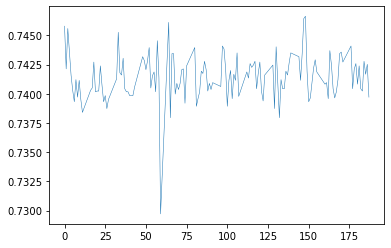

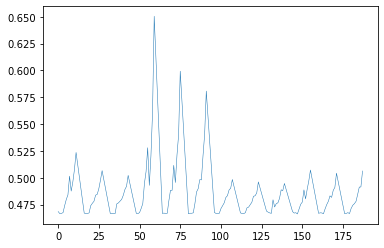

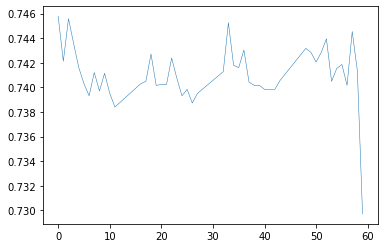

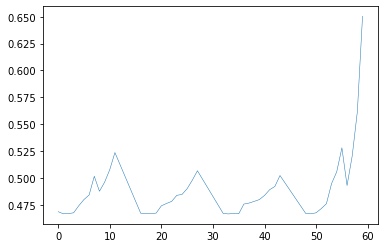

In [22]:
name = 'PN_par10'

df = pd.read_csv(name + '.csv')
df = drop_high_reg(df)

df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
extra_plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
129         129           True          1          64             0.0   

     Dropout      Loss  Accuracy  
129      0.2  0.454237  0.752526  
here min loss:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
114         114           True          1          32             0.0   

     Dropout      Loss  Accuracy  
114      0.4  0.453902  0.751776  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 138
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.747196      0.488365
1    Bidirectional    True          0.750447      0.466971
2        Nr_layers       1          0.750358      0.468655
3        Nr_layers       2          0.747285      0.486681
4       Layer_size      16          0.746364      0.486693
5       Layer_size      32          

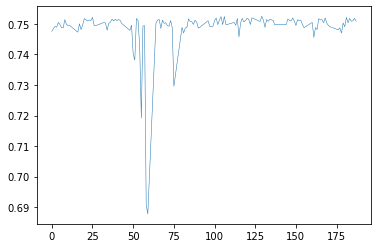

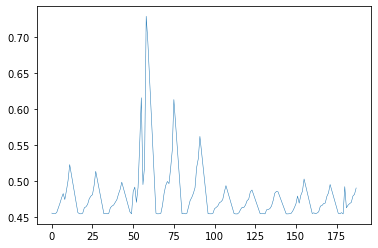

In [23]:
name = 'PN_par15'

df = pd.read_csv(name + '.csv')
df = drop_high_reg(df)

df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
84          84          False          2          64          0.0001      0.0   

        Loss  Accuracy  
84  0.420315  0.804207  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
18          18          False          1          32             0.0      0.4   

        Loss  Accuracy  
18  0.408176  0.800946  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 143
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.800823      0.435373
1    Bidirectional    True          0.800997      0.420286
2        Nr_layers       1          0.801153      0.422662
3        Nr_layers       2          0.800666      0.432997
4       Layer_size      16          0.800368      0.431085
5       Layer_size      32          0.801258

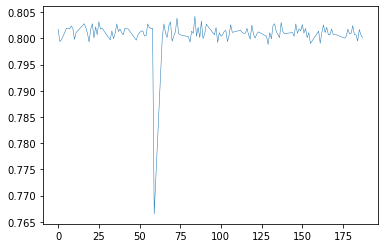

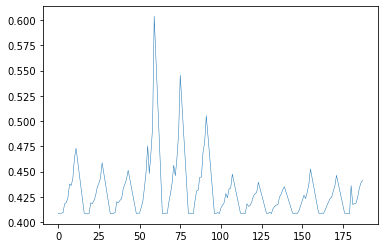

In [24]:
name = 'PN_par20'

df = pd.read_csv(name + '.csv')
df = drop_high_reg(df)

df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
171         171           True          2          32           0.001   

     Dropout      Loss  Accuracy  
171      0.6  0.579358  0.686134  
here min loss:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
177         177           True          2          64             0.0   

     Dropout     Loss  Accuracy  
177      0.2  0.51431  0.678661  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 137
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.679165      0.551611
1    Bidirectional    True          0.680234      0.534977
2        Nr_layers       1          0.680391      0.536512
3        Nr_layers       2          0.679008      0.550075
4       Layer_size      16          0.679328      0.546913
5       Layer_size      32          0.

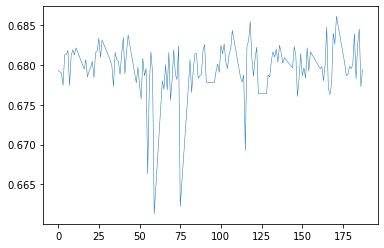

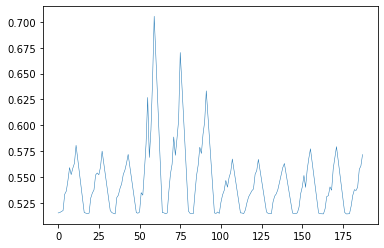

In [25]:
name = 'PN_par25'

df = pd.read_csv(name + '.csv')
df = drop_high_reg(df)

df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
68          68          False          2          32          0.0001      0.0   

        Loss  Accuracy  
68  0.314969  0.791753  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
34          34          False          1          64             0.0      0.4   

        Loss  Accuracy  
34  0.303684    0.7911  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 143
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.787319      0.336221
1    Bidirectional    True          0.788583      0.317297
2        Nr_layers       1          0.788461      0.321286
3        Nr_layers       2          0.787441      0.332232
4       Layer_size      16          0.786801      0.331124
5       Layer_size      32          0.788557

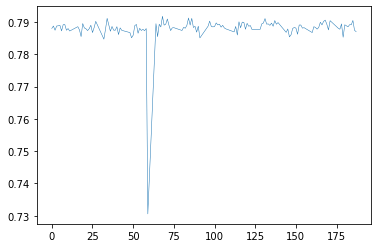

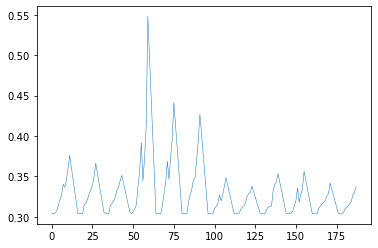

In [26]:
name = 'PN_par30'

df = pd.read_csv(name + '.csv')
df = drop_high_reg(df)

df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
102         102           True          1          16          0.0001   

     Dropout      Loss  Accuracy  
102      0.4  0.326912  0.811786  
here min loss:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
145         145           True          2          16             0.0   

     Dropout     Loss  Accuracy  
145      0.2  0.31629  0.809515  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 143
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.809213      0.348284
1    Bidirectional    True          0.809496      0.329613
2        Nr_layers       1          0.809730      0.332948
3        Nr_layers       2          0.808979      0.344949
4       Layer_size      16          0.808855      0.343114
5       Layer_size      32          0.

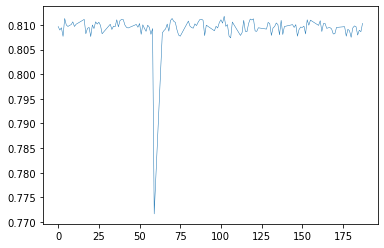

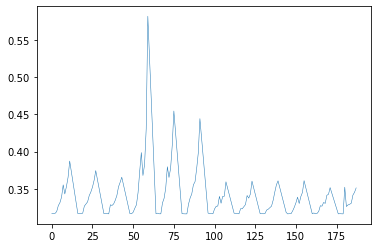

In [27]:
name = 'PN_par35'

df = pd.read_csv(name + '.csv')
df = drop_high_reg(df)

df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
171         171           True          2          32           0.001   

     Dropout      Loss  Accuracy  
171      0.6  0.552286  0.748321  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
81          81          False          2          64             0.0      0.2   

        Loss  Accuracy  
81  0.501541  0.744198  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 140
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.740615      0.536189
1    Bidirectional    True          0.744996      0.515086
2        Nr_layers       1          0.745632      0.515887
3        Nr_layers       2          0.739979      0.535387
4       Layer_size      16          0.738425      0.535661
5       Layer_size      32          0.74

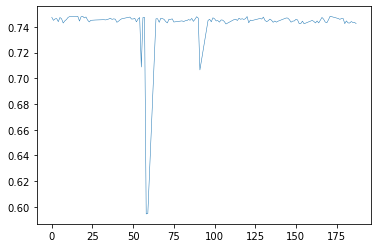

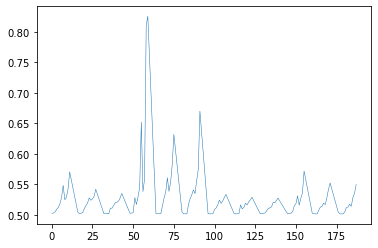

In [28]:
name = 'PN_par40'

df = pd.read_csv(name + '.csv')
df = drop_high_reg(df)

df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
147         147           True          2          16             0.0   

     Dropout    Loss  Accuracy  
147      0.6  0.3983  0.763318  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
66          66          False          2          32             0.0      0.4   

       Loss  Accuracy  
66  0.39775  0.761401  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 137
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.756501      0.437947
1    Bidirectional    True          0.759938      0.408547
2        Nr_layers       1          0.760129      0.410350
3        Nr_layers       2          0.756310      0.436144
4       Layer_size      16          0.756332      0.433710
5       Layer_size      32          0.758794  

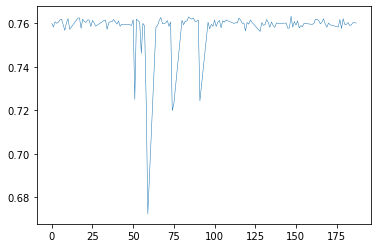

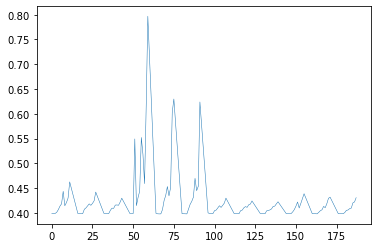

In [29]:
name = 'PN_par45'

df = pd.read_csv(name + '.csv')
df = drop_high_reg(df)

df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
160         160           True          2          32             0.0   

     Dropout      Loss  Accuracy  
160      0.0  0.327312  0.773116  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
82          82          False          2          64             0.0      0.4   

        Loss  Accuracy  
82  0.327212  0.770997  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 144
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.769279      0.359773
1    Bidirectional    True          0.769310      0.343488
2        Nr_layers       1          0.769434      0.345775
3        Nr_layers       2          0.769155      0.357487
4       Layer_size      16          0.769074      0.355568
5       Layer_size      32          0.76

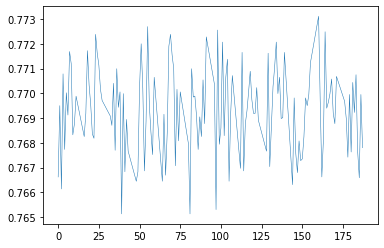

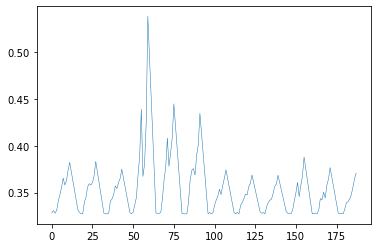

In [30]:
name = 'PN_par50'

df = pd.read_csv(name + '.csv')
df = drop_high_reg(df)

df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

# averages

In [31]:
all_averages = get_average_over_multiple(df_list)

In [32]:
check_how_many_interval(all_averages, max_difference)

here max accuracy:
   Unnamed: 0 Bidirectional Nr_layers Layer_size  Regularization  Dropout  \
64         84         False         2         64          0.0001      0.0   

        Loss  Accuracy  
64  0.445104  0.746545  
here min loss:
    Unnamed: 0 Bidirectional Nr_layers Layer_size  Regularization  Dropout  \
135        179          True         2         64             0.0      0.6   

         Loss  Accuracy  
135  0.433089  0.745622  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']


142

In [33]:
averages_df = get_average_per_setting_over_multiple(averages_list)

In [34]:
print(averages_df)

         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.744125      0.463897
1    Bidirectional    True          0.745524      0.445992
2        Nr_layers       1          0.745592      0.448159
3        Nr_layers       2          0.744057      0.461730
4       Layer_size      16          0.743752      0.460159
5       Layer_size      32          0.745328      0.453079
6       Layer_size      64          0.745394      0.451595
7   Regularization     0.0          0.745372      0.434222
8   Regularization  0.0001          0.745443      0.451398
9   Regularization   0.001          0.743659      0.479214
10         Dropout     0.0          0.745547      0.445310
11         Dropout     0.2          0.745567      0.449498
12         Dropout     0.4          0.744697      0.456474
13         Dropout     0.6          0.743488      0.468496
